In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
zomato_data = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
country_code_data = pd.read_csv('Country_code.csv')

In [10]:
merged_data = pd.merge(zomato_data, country_code_data, on='Country Code', how='left')

In [11]:
print(merged_data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [12]:
print(merged_data.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [13]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
print(merged_data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


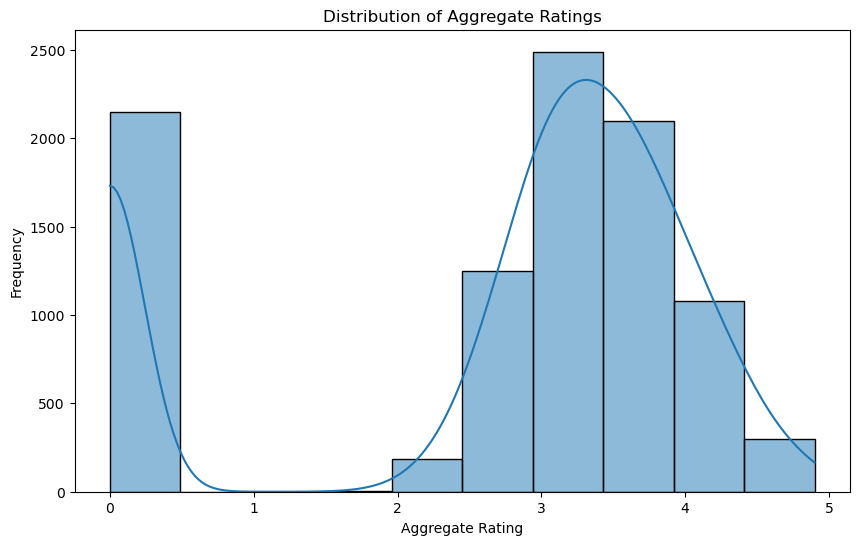

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(merged_data['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

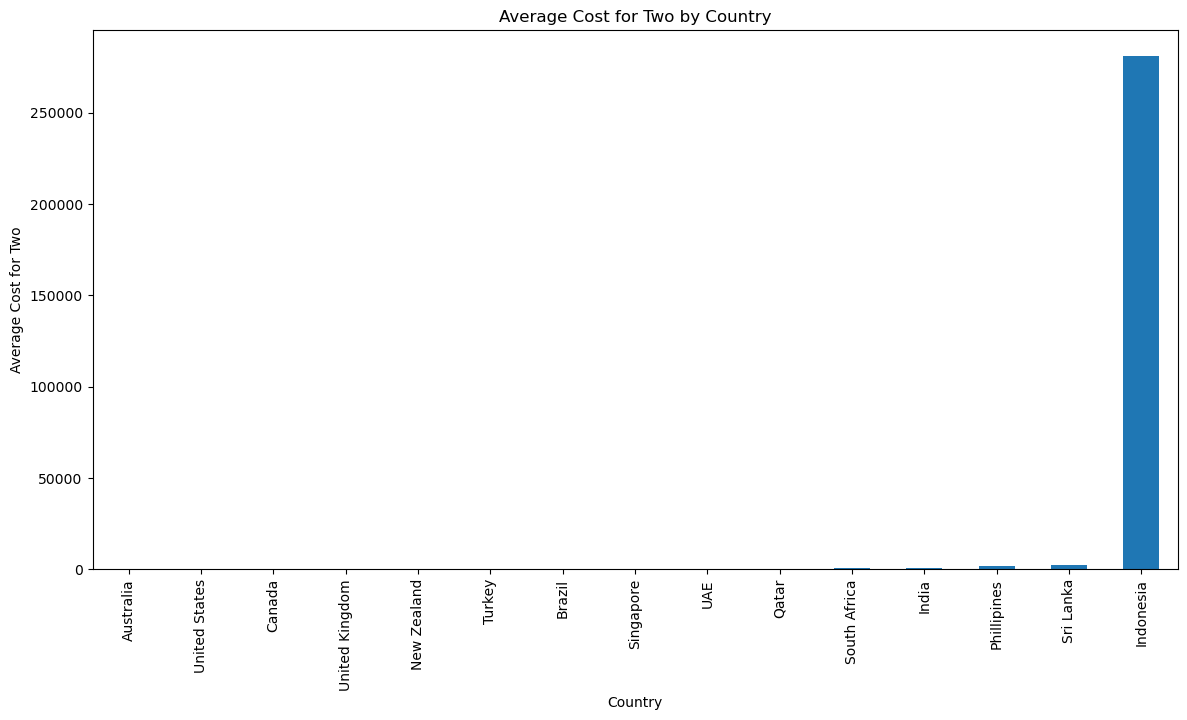

In [16]:
plt.figure(figsize=(14,7))
avg_cost_by_country = merged_data.groupby('Country')['Average Cost for two'].mean().sort_values()
avg_cost_by_country.plot(kind='bar')
plt.title('Average Cost for Two by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost for Two')
plt.show()

In [17]:
le = LabelEncoder()
merged_data['Country'] = le.fit_transform(merged_data['Country'])
merged_data['Cuisines'] = le.fit_transform(merged_data['Cuisines'])
merged_data['Currency'] = le.fit_transform(merged_data['Currency'])

In [18]:
merged_data['Has Online delivery'] = merged_data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes'else 0)
merged_data['Has Table booking'] = merged_data['Has Table booking'].apply(lambda x: 1 if x == 'Yes'else 0)

In [19]:
features = merged_data[['Country', 'Cuisines', 'Has Online delivery', 'Has Table booking', 'Aggregate rating']]

In [20]:
target_cost = merged_data['Average Cost for two']

In [21]:
x_train_cost, x_test_cost, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.2, random_state=42)

In [22]:
model_cost = LinearRegression()
model_cost.fit(x_train_cost, y_train_cost)
predictions_cost = model_cost.predict(x_test_cost)
print('MSE for Average Cost for Two:', mean_squared_error(y_test_cost, predictions_cost))

MSE for Average Cost for Two: 379941410.5799161


In [23]:
target_price_range = merged_data['Price range']

In [24]:
x_train_range, x_test_range, y_train_range, y_test_range = train_test_split(features, target_price_range, test_size=0.2, random_state=42)

In [25]:
classifier_range = RandomForestClassifier()
classifier_range.fit(x_train_range, y_train_range)
prediction_range = classifier_range.predict(x_test_range)
print('Accuracy for Price Range:', accuracy_score(y_test_range, prediction_range))

Accuracy for Price Range: 0.6394557823129252
